## Annexe

In [269]:
def calculate_price_metrics(df):
    """
    Calculate price difference, percentage increase, and CAGR between 2021 and 2025.
    """
    df = df.copy()
    df['Price Difference'] = df['price_USD_2025'] - df['price_USD_2021']
    df['Increase Rate (%)'] = ((df['price_USD_2025'] - df['price_USD_2021']) / df['price_USD_2021']) * 100
    df['CAGR (%)'] = ((df['price_USD_2025'] / df['price_USD_2021']) ** (1/4) - 1) * 100
    return df

In [270]:
def get_extreme_products(df):
    """
    Identify the products with the highest and lowest increase rate.
    """
    product_highest_increase_rate = df[
    df['Increase Rate (%)'] == df['Increase Rate (%)'].max()
    ].reset_index(drop=True)
    product_lowest_increase_rate = df[
    df['Increase Rate (%)'] == df['Increase Rate (%)'].min()
    ].reset_index(drop=True)
    
    return product_highest_increase_rate, product_lowest_increase_rate

In [271]:
def count_increase_directions(df):
    """
    Count the number of products with positive and negative increase rates.
    """
    positive_increase = df[df['Increase Rate (%)'] >= 0].reset_index(drop=True)
    count_positive_increase = positive_increase.shape[0]
    negative_increase = df[df['Increase Rate (%)'] < 0].reset_index(drop=True)
    count_negative_increase = negative_increase.shape[0]
    return positive_increase, count_positive_increase, negative_increase, count_negative_increase

In [272]:
def group_metrics_by_country(df):
    """
    Group the data by 'collection' and 'reference' for a specified country and calculate the mean and median.
    """
    
    metrics = ['price_USD_2021', 'price_USD_2025', 'Price Difference', 'Increase Rate (%)', 'CAGR (%)']
    
    grouped_mean = df.groupby(['collection', 'reference'])[metrics].mean().reset_index()
    grouped_median = df.groupby(['collection', 'reference'])[metrics].median().reset_index()
    return grouped_mean, grouped_median

In [517]:
def describe_country(data):
    """
    Describe the country data.

    Parameters:
    data (pd.DataFrame): The data to describe.
    country (str, optional): The country to filter by. Defaults to None.

    Returns:
    tuple: A tuple containing the number of rows, unique collections, top collection, unique references, top reference, and a list of unique collections.
    """
        
    # Extract required details directly from the original data
    number_unique_collections = data['collection'].nunique()
    top_collection = data['collection'].mode()[0]
    
    number_unique_references = len(set(data['reference'].values))
    top_reference = data['reference'].mode()[0]
    
    collection_list = data['collection'].unique()
    
    return number_unique_collections, top_collection, number_unique_references, top_reference, collection_list


In [892]:
def collection_visualization(data, country=None):
    """
    Visualize the collection data.

    Parameters:
    data (pd.DataFrame): The data to visualize.
    country (str): The country to filter by.

    Returns:
    None
    """
    
    # Choose a color palette
    palette = sns.color_palette("pastel")  # You can choose different palettes like "deep", "pastel", etc.

    # Create the count plot
    ax = sns.countplot(x="collection", data=data, palette=palette)

    # Add the count value on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height() / 2.), 
                    ha='center', va='center', 
                    fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Labels and title
    plt.xlabel("Collection")
    plt.ylabel("Watch Count")
    plt.title(f"Watch Count per Collection")
    if country:
        plt.title(f"Watch Count per Collection in {country}")
    

    # Show the plot
    plt.show()

In [893]:
def analyze_country(data):
    """
    Analyze the country data.

    Parameters:
    data (pd.DataFrame): The data to analyze.
    country (str, optional): The country to filter by. Defaults to None.

    Returns:
    tuple: A tuple containing the overall statistics and the collection statistics.
    """
    
    # Identify the cheapest and most expensive product in the whole subset
    cheapest_product_data = data.nsmallest(1, 'price')
    most_expensive_product_data = data.nlargest(1, 'price')
    
    overall_stats = {
        "cheapest": {
            "collection": cheapest_product_data['collection'].values[0],
            "reference": cheapest_product_data['reference'].values[0],
            "price": cheapest_product_data['price'].values[0]
        },
        "most_expensive": {
            "collection": most_expensive_product_data['collection'].values[0],
            "reference": most_expensive_product_data['reference'].values[0],
            "price": most_expensive_product_data['price'].values[0]
        }
    }
    
    # Identify the cheapest and most expensive product per collection
    collection_stats = []
    unique_collections = data["collection"].unique()
    
    for collection in unique_collections:
        collection_data = data[data["collection"] == collection]
        
        cheapest_collection_data = collection_data.nsmallest(1, 'price')
        most_expensive_collection_data = collection_data.nlargest(1, 'price')
        
        collection_stats.append({
            "collection": collection,
            "cheapest": {
                "reference": cheapest_collection_data['reference'].values[0],
                "price": cheapest_collection_data['price'].values[0]
            },
            "most_expensive": {
                "reference": most_expensive_collection_data['reference'].values[0],
                "price": most_expensive_collection_data['price'].values[0]
            }
        })
    
    return overall_stats, collection_stats

# 1. Import librariries

In [863]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests

# 2. Load & Read the Data

In [864]:
data_2021 = pd.read_csv(r"../data/silver/PANERAI_DATA_2021.csv")
data_2021.head()

,brand,url,image_url,collection,reference,price,currency,country,year,price_EUR,price_GBP,price_USD,price_JPY
0,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/10...,RADIOMIR,PAM00655,9700.0,EUR,France,2021,9700.0,8009.29,10074.42,1516928.68
1,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/11...,RADIOMIR,PAM00628,11600.0,EUR,France,2021,11600.0,9578.12,12047.76,1814059.04
2,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/11...,RADIOMIR,PAM00657,11400.0,EUR,France,2021,11400.0,9412.98,11840.04,1782782.16
3,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/13...,LUMINOR,PAM00661,11900.0,EUR,France,2021,11900.0,9825.83,12359.34,1860974.36
4,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/13...,LUMINOR,PAM01312,7900.0,EUR,France,2021,7900.0,6523.03,8204.94,1235436.76


In [865]:
print(f'Number of products with distinct reference : {len(set(data_2021.reference.values))}')
print(f'Number of existing products by reference : {len(data_2021.reference.values)}')

Number of products with distinct reference : 207
Number of existing products by reference : 687


#### To handle this difference, I will group the dataset by 'reference' and calculate the median price

In [866]:
grouped_data_2021_ref = data_2021.groupby('reference', as_index=False).agg({
    'brand': 'first',
    'year': 'first',
    'collection': 'first',
    'price_USD': 'median'
})
grouped_data_2021_ref.head()

,reference,brand,year,collection,price_USD
0,PAM00233,Panerai,2021,LUMINOR,12969.390
1,PAM00317,Panerai,2021,LUMINOR,22293.069
2,PAM00335,Panerai,2021,LUMINOR,17967.780
3,PAM00372,Panerai,2021,LUMINOR,7232.049
4,PAM00422,Panerai,2021,LUMINOR,10441.590


In [867]:
print(f'Number of products with distinct reference : {len(set(grouped_data_2021_ref.reference.values))}')
print(f'Number of existing products by reference : {len(grouped_data_2021_ref.reference.values)}')

Number of products with distinct reference : 207
Number of existing products by reference : 207


In [868]:
data_2025 = pd.read_csv(r"../data/silver/2025-03-02_00-24-15/PANERAI_DATA_2025.csv")
data_2025.head()

,currency,brand,country,reference,year,product_url,image_url,price,collection,name,availability,currency_code,price_USD,price_GBP,price_EUR,price_JPY
0,$,PANERAI,USA,PAM01570,2025,https://www.panerai.com/us/en/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/km...,6000,Radiomir,Radiomir Quaranta,Available,USD,6000.0,4764.0,5776.80,903423.0
1,$,PANERAI,USA,PAM01571,2025,https://www.panerai.com/us/en/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/Ot...,6000,Radiomir,Radiomir Quaranta,Out of Stock,USD,6000.0,4764.0,5776.80,903423.0
2,$,PANERAI,USA,PAM01572,2025,https://www.panerai.com/us/en/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/lz...,6000,Radiomir,Radiomir Quaranta,Available,USD,6000.0,4764.0,5776.80,903423.0
3,$,PANERAI,USA,PAM01573,2025,https://www.panerai.com/us/en/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/iY...,6000,Radiomir,Radiomir Quaranta,Available,USD,6000.0,4764.0,5776.80,903423.0
4,$,PANERAI,USA,PAM01385,2025,https://www.panerai.com/us/en/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/bc...,5400,Radiomir,Radiomir Officine,Out of Stock,USD,5400.0,4287.6,5199.12,813080.7


In [869]:
print(f'Number of products with distinct reference : {len(set(data_2025.reference.values))}')
print(f'Number of existing products by reference : {len(data_2025.reference.values)}')

Number of products with distinct reference : 149
Number of existing products by reference : 590


#### To handle this difference, I will group the dataset by 'reference' and calculate the median price

In [870]:
grouped_data_2025_ref = data_2025.groupby('reference', as_index=False).agg({
    'brand': 'first',
    'year': 'first',
    'collection': 'first',
    'price_USD': 'median'
})
grouped_data_2025_ref.head()

,reference,brand,year,collection,price_USD
0,PAM00422,PANERAI,2025,Luminor,11633.4025
1,PAM00600,PANERAI,2025,Radiomir,398400.0000
2,PAM00670,PANERAI,2025,Luminor,24776.2650
3,PAM00715,PANERAI,2025,Luminor,66894.5730
4,PAM00742,PANERAI,2025,Luminor,48352.9090


# 3. Data and Business Analysis

## 3.1. Commun products since 2021

In [871]:
data_2021_2025_ref = pd.merge(grouped_data_2025_ref, grouped_data_2021_ref, on='reference', how='inner')
data_2021_2025_ref = data_2021_2025_ref.rename(columns={'brand_x': 'brand', 'collection_x': 'collection', 'year_x': 'year_2025', 'price_USD_x': 'price_USD_2025', 'year_y': 'year_2021', 'price_USD_y': 'price_USD_2021'})
data_2021_2025_ref = data_2021_2025_ref[['brand', 'reference', 'collection', 'price_USD_2021', 'price_USD_2025']]

data_2021_2025_ref.head()

,brand,reference,collection,price_USD_2021,price_USD_2025
0,PANERAI,PAM00422,Luminor,10441.59,11633.4025
1,PANERAI,PAM00670,Luminor,22745.34,24776.2650
2,PANERAI,PAM00715,Luminor,71677.98,66894.5730
3,PANERAI,PAM00742,Luminor,49957.38,48352.9090
4,PANERAI,PAM00914,Luminor,6439.32,7288.9600


### 3.1.1. Calculate Price Metrics

In [872]:
data_2021_2025_ref = calculate_price_metrics(data_2021_2025_ref)

In [873]:
data_2021_2025_ref.head()

,brand,reference,collection,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,PANERAI,PAM00422,Luminor,10441.59,11633.4025,1191.8125,11.414090,2.738928
1,PANERAI,PAM00670,Luminor,22745.34,24776.2650,2030.9250,8.928972,2.161168
2,PANERAI,PAM00715,Luminor,71677.98,66894.5730,-4783.4070,-6.673468,-1.711823
3,PANERAI,PAM00742,Luminor,49957.38,48352.9090,-1604.4710,-3.211680,-0.812775
4,PANERAI,PAM00914,Luminor,6439.32,7288.9600,849.6400,13.194561,3.146950


In [874]:
positive_increase, count_positive_increase, negative_increase, count_negative_increase = count_increase_directions(data_2021_2025_ref)

print("Overall Summary:\n")
print(f"Total of products analyzed (These products have been consistently purchased since 2021): {len(set(data_2021_2025['reference'].values))}")
print(f"Total of Products with a positive increase rate: {count_positive_increase}")
print(f"Total Products with a negative increase rate: {count_negative_increase}\n")

Overall Summary:

Total of products analyzed (These products have been consistently purchased since 2021): 31
Total of Products with a positive increase rate: 28
Total Products with a negative increase rate: 3



In [875]:
print("Product with Positive Increase Rate:")
positive_increase.head()

Product with Positive Increase Rate:


,brand,reference,collection,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,PANERAI,PAM00422,Luminor,10441.59,11633.4025,1191.8125,11.414090,2.738928
1,PANERAI,PAM00670,Luminor,22745.34,24776.2650,2030.9250,8.928972,2.161168
2,PANERAI,PAM00914,Luminor,6439.32,7288.9600,849.6400,13.194561,3.146950
3,PANERAI,PAM00915,Luminor,7131.57,7798.6100,667.0400,9.353340,2.260524
4,PANERAI,PAM00968,Submersible,17573.16,19217.2280,1644.0680,9.355563,2.261043


In [876]:
print("Product with Negative Increase Rate:")
negative_increase.head()

Product with Negative Increase Rate:


,brand,reference,collection,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,PANERAI,PAM00715,Luminor,71677.98,66894.573,-4783.407,-6.673468,-1.711823
1,PANERAI,PAM00742,Luminor,49957.38,48352.909,-1604.471,-3.211680,-0.812775
2,PANERAI,PAM01060,Luminor,179525.34,175623.128,-3902.212,-2.173627,-0.547893


### 3.1.2. Identify Products with Extreme Growth Rates

In [877]:
product_highest_increase_rate, product_lowest_increase_rate = get_extreme_products(data_2021_2025_ref)

In [878]:
# Product with the highest increase rate
print("Product with the Highest Increase Rate:")
product_highest_increase_rate.head()

Product with the Highest Increase Rate:


,brand,reference,collection,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,PANERAI,PAM01441,Luminor,13433.49,15381.0875,1947.5975,14.498075,3.442628


In [879]:
# Product with the lowest increase rate
print("\nProduct with the Lowest Increase Rate:")
product_lowest_increase_rate.head()


Product with the Lowest Increase Rate:


,brand,reference,collection,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,PANERAI,PAM00715,Luminor,71677.98,66894.573,-4783.407,-6.673468,-1.711823


### 3.1.3. Count Products by Increase Direction

In [785]:
data_2021_2025_grouped_mean, data_2021_2025_grouped_median = group_metrics_by_country(data_2021_2025_ref)

In [786]:
print(f"\nGrouped Mean Metrics by Collection and Reference:")
data_2021_2025_grouped_mean.head()


Grouped Mean Metrics by Collection and Reference:


,collection,reference,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,Luminor,PAM00422,10441.59,11633.4025,1191.8125,11.414090,2.738928
1,Luminor,PAM00670,22745.34,24776.2650,2030.9250,8.928972,2.161168
2,Luminor,PAM00715,71677.98,66894.5730,-4783.4070,-6.673468,-1.711823
3,Luminor,PAM00742,49957.38,48352.9090,-1604.4710,-3.211680,-0.812775
4,Luminor,PAM00914,6439.32,7288.9600,849.6400,13.194561,3.146950


In [787]:
print(f"\nGrouped Median Metrics by Collection and Reference:")
data_2021_2025_grouped_median.head()


Grouped Median Metrics by Collection and Reference:


,collection,reference,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,Luminor,PAM00422,10441.59,11633.4025,1191.8125,11.414090,2.738928
1,Luminor,PAM00670,22745.34,24776.2650,2030.9250,8.928972,2.161168
2,Luminor,PAM00715,71677.98,66894.5730,-4783.4070,-6.673468,-1.711823
3,Luminor,PAM00742,49957.38,48352.9090,-1604.4710,-3.211680,-0.812775
4,Luminor,PAM00914,6439.32,7288.9600,849.6400,13.194561,3.146950


### 3.1.4 Analysis for a given country

#### 3.1.4.1. France

In [788]:
country = 'France'

In [789]:
data_2021_country = data_2021[['brand','reference','collection', 'price_USD']][data_2021['country'] == country]
data_2025_country = data_2025[['brand','reference','collection', 'price_USD']][data_2025['country'] == country]

In [790]:
data_2021_2025_country_ref = pd.merge(data_2025_country, data_2021_country, on='reference', how='inner')
data_2021_2025_country_ref = data_2021_2025_country_ref.rename(columns={'brand_x': 'brand', 'collection_x': 'collection', 'year_x': 'year_2025', 'price_USD_x': 'price_USD_2025', 'year_y': 'year_2021', 'price_USD_y': 'price_USD_2021'})
data_2021_2025_country_ref = data_2021_2025_country_ref[['brand', 'reference', 'collection', 'price_USD_2021', 'price_USD_2025']]

data_2021_2025_country_ref.head()

,brand,reference,collection,price_USD_2021,price_USD_2025
0,PANERAI,PAM01086,Luminor,5089.14,5920.02
1,PANERAI,PAM01084,Luminor,5608.44,6439.32
2,PANERAI,PAM01085,Luminor,5608.44,6439.32
3,PANERAI,PAM00914,Luminor,6439.32,7477.92
4,PANERAI,PAM00915,Luminor,6958.62,7997.22


In [791]:
data_2021_2025_country_ref = calculate_price_metrics(data_2021_2025_country_ref)

In [792]:
positive_increase, count_positive_increase, negative_increase, count_negative_increase = count_increase_directions(data_2021_2025_country_ref)

print("Overall Summary:\n")
print(f"Total of products analyzed (These products have been consistently purchased since 2021): {data_2021_2025_country_ref.shape[0]}")
print(f"Total of Products with a positive increase rate: {count_positive_increase}")
print(f"Total Products with a negative increase rate: {count_negative_increase}\n")

Overall Summary:

Total of products analyzed (These products have been consistently purchased since 2021): 31
Total of Products with a positive increase rate: 31
Total Products with a negative increase rate: 0



In [793]:
print("Product with Positive Increase Rate:")
positive_increase.head()

Product with Positive Increase Rate:


,brand,reference,collection,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,PANERAI,PAM01086,Luminor,5089.14,5920.02,830.88,16.326531,3.853155
1,PANERAI,PAM01084,Luminor,5608.44,6439.32,830.88,14.814815,3.514093
2,PANERAI,PAM01085,Luminor,5608.44,6439.32,830.88,14.814815,3.514093
3,PANERAI,PAM00914,Luminor,6439.32,7477.92,1038.60,16.129032,3.809046
4,PANERAI,PAM00915,Luminor,6958.62,7997.22,1038.60,14.925373,3.539003


In [794]:
print("Product with Negative Increase Rate:")
negative_increase.head()

Product with Negative Increase Rate:


,brand,reference,collection,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)


#### Identify Products with Extreme Growth Rates

In [795]:
product_highest_increase_rate, product_lowest_increase_rate = get_extreme_products(data_2021_2025_country_ref)

In [796]:
# Product with the highest increase rate
print("Product with the Highest Increase Rate:")
product_highest_increase_rate.head()

Product with the Highest Increase Rate:


,brand,reference,collection,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,PANERAI,PAM00422,Luminor,10178.28,11943.9,1765.62,17.346939,4.080158


In [797]:
# Product with the lowest increase rate
print("\nProduct with the Lowest Increase Rate:")
product_lowest_increase_rate.head()


Product with the Lowest Increase Rate:


,brand,reference,collection,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,PANERAI,PAM00715,Luminor,68547.6,74779.2,6231.6,9.090909,2.199116


#### Count Products by Increase Direction

In [798]:
data_2021_2025_grouped_mean, data_2021_2025_grouped_median = group_metrics_by_country(data_2021_2025_country_ref)

In [799]:
print(f"\nGrouped Mean Metrics by Collection and Reference:")
data_2021_2025_grouped_mean.head()


Grouped Mean Metrics by Collection and Reference:


,collection,reference,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,Luminor,PAM00422,10178.28,11943.90,1765.62,17.346939,4.080158
1,Luminor,PAM00670,22745.34,25445.70,2700.36,11.872146,2.844363
2,Luminor,PAM00715,68547.60,74779.20,6231.60,9.090909,2.199116
3,Luminor,PAM00742,47775.60,54007.20,6231.60,13.043478,3.112515
4,Luminor,PAM00914,6439.32,7477.92,1038.60,16.129032,3.809046


In [800]:
print(f"\nGrouped Median Metrics by Collection and Reference:")
data_2021_2025_grouped_median.head()


Grouped Median Metrics by Collection and Reference:


,collection,reference,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,Luminor,PAM00422,10178.28,11943.90,1765.62,17.346939,4.080158
1,Luminor,PAM00670,22745.34,25445.70,2700.36,11.872146,2.844363
2,Luminor,PAM00715,68547.60,74779.20,6231.60,9.090909,2.199116
3,Luminor,PAM00742,47775.60,54007.20,6231.60,13.043478,3.112515
4,Luminor,PAM00914,6439.32,7477.92,1038.60,16.129032,3.809046


#### 3.1.4.2. USA

In [801]:
country = "USA"

In [802]:
data_2021_country = data_2021[['brand','reference','collection', 'price_USD']][data_2021['country'] == country]
data_2025_country = data_2025[['brand','reference','collection', 'price_USD']][data_2025['country'] == country]

In [803]:
data_2021_2025_country_ref = pd.merge(data_2025_country, data_2021_country, on='reference', how='inner')
data_2021_2025_country_ref = data_2021_2025_country_ref.rename(columns={'brand_x': 'brand', 'collection_x': 'collection', 'year_x': 'year_2025', 'price_USD_x': 'price_USD_2025', 'year_y': 'year_2021', 'price_USD_y': 'price_USD_2021'})
data_2021_2025_country_ref = data_2021_2025_country_ref[['brand', 'reference', 'collection', 'price_USD_2021', 'price_USD_2025']]

data_2021_2025_country_ref.head()

,brand,reference,collection,price_USD_2021,price_USD_2025
0,PANERAI,PAM01086,Luminor,6400.0,5600.0
1,PANERAI,PAM01084,Luminor,7100.0,6100.0
2,PANERAI,PAM01085,Luminor,7100.0,6100.0
3,PANERAI,PAM00915,Luminor,8800.0,7600.0
4,PANERAI,PAM00422,Luminor,12800.0,11300.0


In [804]:
data_2021_2025_country_ref = calculate_price_metrics(data_2021_2025_country_ref)

In [805]:
positive_increase, count_positive_increase, negative_increase, count_negative_increase = count_increase_directions(data_2021_2025_country_ref)

print("Overall Summary:\n")
print(f"Total of products analyzed (These products have been consistently purchased since 2021): {data_2021_2025_country_ref.shape[0]}")
print(f"Total of Products with a positive increase rate: {count_positive_increase}")
print(f"Total Products with a negative increase rate: {count_negative_increase}\n")

Overall Summary:

Total of products analyzed (These products have been consistently purchased since 2021): 29
Total of Products with a positive increase rate: 0
Total Products with a negative increase rate: 29



In [806]:
print("Product with Positive Increase Rate:")
positive_increase.head()

Product with Positive Increase Rate:


,brand,reference,collection,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)


In [807]:
print("Product with Negative Increase Rate:")
negative_increase.head()

Product with Negative Increase Rate:


,brand,reference,collection,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,PANERAI,PAM01086,Luminor,6400.0,5600.0,-800.0,-12.500000,-3.283179
1,PANERAI,PAM01084,Luminor,7100.0,6100.0,-1000.0,-14.084507,-3.724037
2,PANERAI,PAM01085,Luminor,7100.0,6100.0,-1000.0,-14.084507,-3.724037
3,PANERAI,PAM00915,Luminor,8800.0,7600.0,-1200.0,-13.636364,-3.598736
4,PANERAI,PAM00422,Luminor,12800.0,11300.0,-1500.0,-11.718750,-3.068012


#### Identify Products with Extreme Growth Rates

In [808]:
product_highest_increase_rate, product_lowest_increase_rate = get_extreme_products(data_2021_2025_country_ref)

In [809]:
# Product with the highest increase rate
print("Product with the Highest Increase Rate:")
product_highest_increase_rate.head()

Product with the Highest Increase Rate:


,brand,reference,collection,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,PANERAI,PAM00968,Submersible,20900.0,18600.0,-2300.0,-11.004785,-2.872622


In [810]:
# Product with the lowest increase rate
print("\nProduct with the Lowest Increase Rate:")
product_lowest_increase_rate.head()


Product with the Lowest Increase Rate:


,brand,reference,collection,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,PANERAI,PAM00715,Luminor,85900.0,62400.0,-23500.0,-27.357392,-7.679562


#### Count Products by Increase Direction

In [811]:
data_2021_2025_grouped_mean, data_2021_2025_grouped_median = group_metrics_by_country(data_2021_2025_country_ref)

In [812]:
print(f"\nGrouped Mean Metrics by Collection and Reference:")
data_2021_2025_grouped_mean.head()


Grouped Mean Metrics by Collection and Reference:


,collection,reference,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,Luminor,PAM00422,12800.0,11300.0,-1500.0,-11.718750,-3.068012
1,Luminor,PAM00715,85900.0,62400.0,-23500.0,-27.357392,-7.679562
2,Luminor,PAM00742,59700.0,45100.0,-14600.0,-24.455611,-6.771102
3,Luminor,PAM00915,8800.0,7600.0,-1200.0,-13.636364,-3.598736
4,Luminor,PAM01060,217000.0,163700.0,-53300.0,-24.562212,-6.804008


In [813]:
print(f"\nGrouped Median Metrics by Collection and Reference:")
data_2021_2025_grouped_median.head()


Grouped Median Metrics by Collection and Reference:


,collection,reference,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,Luminor,PAM00422,12800.0,11300.0,-1500.0,-11.718750,-3.068012
1,Luminor,PAM00715,85900.0,62400.0,-23500.0,-27.357392,-7.679562
2,Luminor,PAM00742,59700.0,45100.0,-14600.0,-24.455611,-6.771102
3,Luminor,PAM00915,8800.0,7600.0,-1200.0,-13.636364,-3.598736
4,Luminor,PAM01060,217000.0,163700.0,-53300.0,-24.562212,-6.804008


#### 3.1.4.3. UK

In [814]:
country = "UK"

In [815]:
data_2021_country = data_2021[['brand','reference','collection', 'price_USD']][data_2021['country'] == country]
data_2025_country = data_2025[['brand','reference','collection', 'price_USD']][data_2025['country'] == country]

In [816]:
data_2021_2025_country_ref = pd.merge(data_2025_country, data_2021_country, on='reference', how='inner')
data_2021_2025_country_ref = data_2021_2025_country_ref.rename(columns={'brand_x': 'brand', 'collection_x': 'collection', 'year_x': 'year_2025', 'price_USD_x': 'price_USD_2025', 'year_y': 'year_2021', 'price_USD_y': 'price_USD_2021'})
data_2021_2025_country_ref = data_2021_2025_country_ref[['brand', 'reference', 'collection', 'price_USD_2021', 'price_USD_2025']]

data_2021_2025_country_ref.head()

,brand,reference,collection,price_USD_2021,price_USD_2025
0,PANERAI,PAM01086,Luminor,5415.42,6171.06
1,PANERAI,PAM01084,Luminor,6045.12,6674.82
2,PANERAI,PAM01085,Luminor,6045.12,6674.82
3,PANERAI,PAM00914,Luminor,6800.76,7682.34
4,PANERAI,PAM00915,Luminor,7304.52,8186.10


In [817]:
data_2021_2025_country_ref = calculate_price_metrics(data_2021_2025_country_ref)

In [818]:
positive_increase, count_positive_increase, negative_increase, count_negative_increase = count_increase_directions(data_2021_2025_country_ref)

print("Overall Summary:\n")
print(f"Total of products analyzed (These products have been consistently purchased since 2021): {data_2021_2025_country_ref.shape[0]}")
print(f"Total of Products with a positive increase rate: {count_positive_increase}")
print(f"Total Products with a negative increase rate: {count_negative_increase}\n")

Overall Summary:

Total of products analyzed (These products have been consistently purchased since 2021): 31
Total of Products with a positive increase rate: 28
Total Products with a negative increase rate: 3



In [819]:
print("Product with Positive Increase Rate:")
positive_increase.head()

Product with Positive Increase Rate:


,brand,reference,collection,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,PANERAI,PAM01086,Luminor,5415.42,6171.06,755.64,13.953488,3.319407
1,PANERAI,PAM01084,Luminor,6045.12,6674.82,629.70,10.416667,2.508212
2,PANERAI,PAM01085,Luminor,6045.12,6674.82,629.70,10.416667,2.508212
3,PANERAI,PAM00914,Luminor,6800.76,7682.34,881.58,12.962963,3.094149
4,PANERAI,PAM00915,Luminor,7304.52,8186.10,881.58,12.068966,2.889567


In [820]:
print("Product with Negative Increase Rate:")
negative_increase.head()

Product with Negative Increase Rate:


,brand,reference,collection,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,PANERAI,PAM00742,Luminor,52139.16,45716.22,-6422.94,-12.318841,-3.233157
1,PANERAI,PAM00715,Luminor,74808.36,63221.88,-11586.48,-15.488215,-4.119715
2,PANERAI,PAM01060,Luminor,186643.08,165988.92,-20654.16,-11.066127,-2.889363


#### Identify Products with Extreme Growth Rates

In [821]:
product_highest_increase_rate, product_lowest_increase_rate = get_extreme_products(data_2021_2025_country_ref)

In [822]:
# Product with the highest increase rate
print("Product with the Highest Increase Rate:")
product_highest_increase_rate.head()

Product with the Highest Increase Rate:


,brand,reference,collection,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,PANERAI,PAM01441,Luminor,12845.88,16246.26,3400.38,26.470588,6.046755


In [823]:
# Product with the lowest increase rate
print("\nProduct with the Lowest Increase Rate:")
product_lowest_increase_rate.head()


Product with the Lowest Increase Rate:


,brand,reference,collection,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,PANERAI,PAM00715,Luminor,74808.36,63221.88,-11586.48,-15.488215,-4.119715


#### Count Products by Increase Direction

In [824]:
data_2021_2025_grouped_mean, data_2021_2025_grouped_median = group_metrics_by_country(data_2021_2025_country_ref)

In [825]:
print(f"\nGrouped Mean Metrics by Collection and Reference:")
data_2021_2025_grouped_mean.head()


Grouped Mean Metrics by Collection and Reference:


,collection,reference,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,Luminor,PAM00422,10704.90,12342.12,1637.22,15.294118,3.621956
1,Luminor,PAM00670,24306.42,26069.58,1763.16,7.253886,1.766130
2,Luminor,PAM00715,74808.36,63221.88,-11586.48,-15.488215,-4.119715
3,Luminor,PAM00742,52139.16,45716.22,-6422.94,-12.318841,-3.233157
4,Luminor,PAM00914,6800.76,7682.34,881.58,12.962963,3.094149


In [826]:
print(f"\nGrouped Median Metrics by Collection and Reference:")
data_2021_2025_grouped_median.head()


Grouped Median Metrics by Collection and Reference:


,collection,reference,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,Luminor,PAM00422,10704.90,12342.12,1637.22,15.294118,3.621956
1,Luminor,PAM00670,24306.42,26069.58,1763.16,7.253886,1.766130
2,Luminor,PAM00715,74808.36,63221.88,-11586.48,-15.488215,-4.119715
3,Luminor,PAM00742,52139.16,45716.22,-6422.94,-12.318841,-3.233157
4,Luminor,PAM00914,6800.76,7682.34,881.58,12.962963,3.094149


#### 3.1.4.4. Japan

In [827]:
country = "Japan"

In [828]:
data_2021_country = data_2021[['brand','reference','collection', 'price_USD']][data_2021['country'] == country]
data_2025_country = data_2025[['brand','reference','collection', 'price_USD']][data_2025['country'] == country]

In [829]:
data_2021_2025_country_ref = pd.merge(data_2025_country, data_2021_country, on='reference', how='inner')
data_2021_2025_country_ref = data_2021_2025_country_ref.rename(columns={'brand_x': 'brand', 'collection_x': 'collection', 'year_x': 'year_2025', 'price_USD_x': 'price_USD_2025', 'year_y': 'year_2021', 'price_USD_y': 'price_USD_2021'})
data_2021_2025_country_ref = data_2021_2025_country_ref[['brand', 'reference', 'collection', 'price_USD_2021', 'price_USD_2025']]

data_2021_2025_country_ref.head()

,brand,reference,collection,price_USD_2021,price_USD_2025
0,PANERAI,PAM01086,Luminor,4090.856,5624.927
1,PANERAI,PAM01084,Luminor,4456.111,6136.284
2,PANERAI,PAM01085,Luminor,4456.111,6136.284
3,PANERAI,PAM00914,Luminor,5113.570,7085.947
4,PANERAI,PAM00915,Luminor,5551.876,7597.304


In [830]:
data_2021_2025_country_ref = calculate_price_metrics(data_2021_2025_country_ref)

In [831]:
positive_increase, count_positive_increase, negative_increase, count_negative_increase = count_increase_directions(data_2021_2025_country_ref)

print("Overall Summary:\n")
print(f"Total of products analyzed (These products have been consistently purchased since 2021): {data_2021_2025_country_ref.shape[0]}")
print(f"Total of Products with a positive increase rate: {count_positive_increase}")
print(f"Total Products with a negative increase rate: {count_negative_increase}\n")

Overall Summary:

Total of products analyzed (These products have been consistently purchased since 2021): 31
Total of Products with a positive increase rate: 31
Total Products with a negative increase rate: 0



In [832]:
print("Product with Positive Increase Rate:")
positive_increase.head()

Product with Positive Increase Rate:


,brand,reference,collection,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,PANERAI,PAM01086,Luminor,4090.856,5624.927,1534.071,37.500000,8.286839
1,PANERAI,PAM01084,Luminor,4456.111,6136.284,1680.173,37.704918,8.327161
2,PANERAI,PAM01085,Luminor,4456.111,6136.284,1680.173,37.704918,8.327161
3,PANERAI,PAM00914,Luminor,5113.570,7085.947,1972.377,38.571429,8.497173
4,PANERAI,PAM00915,Luminor,5551.876,7597.304,2045.428,36.842105,8.157076


In [833]:
print("Product with Negative Increase Rate:")
negative_increase.head()

Product with Negative Increase Rate:


,brand,reference,collection,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)


#### Identify Products with Extreme Growth Rates

In [834]:
product_highest_increase_rate, product_lowest_increase_rate = get_extreme_products(data_2021_2025_country_ref)

In [835]:
# Product with the highest increase rate
print("Product with the Highest Increase Rate:")
product_highest_increase_rate.head()

Product with the Highest Increase Rate:


,brand,reference,collection,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,PANERAI,PAM01250,Luminor Due,5186.621,7305.1,2118.479,40.84507,8.939509


In [836]:
# Product with the lowest increase rate
print("\nProduct with the Lowest Increase Rate:")
product_lowest_increase_rate.head()


Product with the Lowest Increase Rate:


,brand,reference,collection,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,PANERAI,PAM00715,Luminor,54569.097,70567.266,15998.169,29.317269,6.638525


#### Count Products by Increase Direction

In [837]:
data_2021_2025_grouped_mean, data_2021_2025_grouped_median = group_metrics_by_country(data_2021_2025_country_ref)

In [838]:
print(f"\nGrouped Mean Metrics by Collection and Reference:")
data_2021_2025_grouped_mean.head()


Grouped Mean Metrics by Collection and Reference:


,collection,reference,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,Luminor,PAM00422,8108.661,11322.905,3214.244,39.639640,8.705666
1,Luminor,PAM00670,18262.750,24106.830,5844.080,32.000000,7.187337
2,Luminor,PAM00715,54569.097,70567.266,15998.169,29.317269,6.638525
3,Luminor,PAM00742,37986.520,50989.598,13003.078,34.230769,7.637356
4,Luminor,PAM00914,5113.570,7085.947,1972.377,38.571429,8.497173


In [839]:
print(f"\nGrouped Median Metrics by Collection and Reference:")
data_2021_2025_grouped_median.head()


Grouped Median Metrics by Collection and Reference:


,collection,reference,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,Luminor,PAM00422,8108.661,11322.905,3214.244,39.639640,8.705666
1,Luminor,PAM00670,18262.750,24106.830,5844.080,32.000000,7.187337
2,Luminor,PAM00715,54569.097,70567.266,15998.169,29.317269,6.638525
3,Luminor,PAM00742,37986.520,50989.598,13003.078,34.230769,7.637356
4,Luminor,PAM00914,5113.570,7085.947,1972.377,38.571429,8.497173


### 3.2. From 2021 to 2025: Products That Vanished

In [894]:
data_2021_only = data_2021[~data_2021['reference'].isin(data_2025['reference'])]
data_2021_only.to_csv("../data/silver/Exclusive_watches_2021.csv", index=False)
data_2021_only.to_csv("../data/gold/Exclusive_watches_2021.csv", index=False)

data_2021_only.head()

,brand,url,image_url,collection,reference,price,currency,country,year,price_EUR,price_GBP,price_USD,price_JPY
0,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/10...,RADIOMIR,PAM00655,9700.0,EUR,France,2021,9700.0,8009.29,10074.42,1516928.68
1,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/11...,RADIOMIR,PAM00628,11600.0,EUR,France,2021,11600.0,9578.12,12047.76,1814059.04
2,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/11...,RADIOMIR,PAM00657,11400.0,EUR,France,2021,11400.0,9412.98,11840.04,1782782.16
3,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/13...,LUMINOR,PAM00661,11900.0,EUR,France,2021,11900.0,9825.83,12359.34,1860974.36
5,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/13...,LUMINOR,PAM01499,7900.0,EUR,France,2021,7900.0,6523.03,8204.94,1235436.76


In [895]:
stats = data_2021_only.describe(include="object")

In [896]:
number_unique_collections, top_collection, _, top_reference, collection_list = describe_country(data_2021_only)

print("Overall Summary:\n")
print(f"Total Number of Products from 2021 No Longer Available: {len(set(data_2021.reference.values)) - len(set(data_2025.reference.values))}")

if number_unique_collections == 1:
    print(f"\nThere is a unique collection, named {top_collection}")
else:
    print(f"\nWe have {number_unique_collections} collections, and {top_collection} is the leading one")

print("\nCatalog of Collections:")
print("\n".join([f"{i+1}. {collection}" for i, collection in enumerate(collection_list)]))

if number_unique_references == 1:
    print(f"\nThere is a unique reference: {top_reference}")
else:
    # Use the original data for lookup, not the summary!
    collection_for_top_reference = data_2021_only[data_2021_only['reference'] == top_reference]['collection'].iloc[0]
    print(f"\nWe have a total of {number_unique_references} distinct products, with {top_reference} leading the selection from the {collection_for_top_reference} collection")


Overall Summary:

Total Number of Products from 2021 No Longer Available: 58

We have 4 collections, and LUMINOR is the leading one

Catalog of Collections:
1. RADIOMIR
2. LUMINOR
3. SUBMERSIBLE
4. LUMINOR-DUE

We have a total of 176 distinct products, with PAM00233 leading the selection from the LUMINOR collection


In [897]:
# Countries
number_unique_countries, top_country = stats["country"].unique()[1], stats["country"].unique()[2]
if number_unique_countries == 1:
    print(f"Our study is applied to a unique country, {top_country}")
else:
    print(f"Our study is applied to {number_unique_countries} countries, with {top_country} being the top one")

Our study is applied to 4 countries, with Japan being the top one


In [898]:
countries_list = data_2021_only["country"].unique()

print("Countries Included in the Study:\n")
for i in range(len(countries_list)):
    print(f"\t{i+1}. {countries_list[i]}")

Countries Included in the Study:

	1. France
	2. UK
	3. Japan
	4. USA


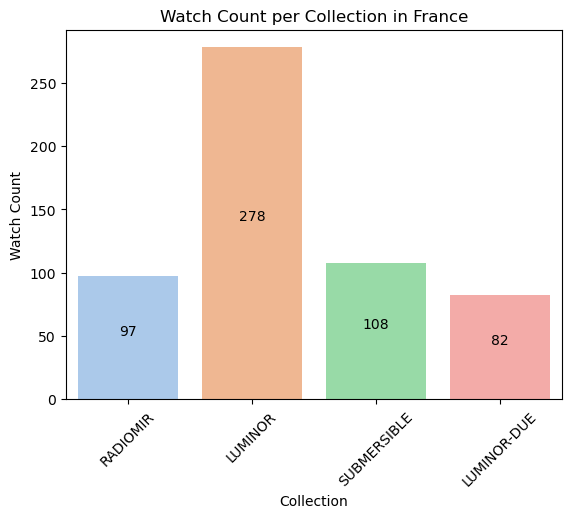

In [899]:
collection_visualization(data_2021_only, country)

#### 3.2.1. Analysis for a given country

#### 3.2.1.1. France

In [900]:
country = "France"

data_2021_country = data_2021[data_2021['country'] == country]
data_2025_country = data_2025[data_2025['country'] == country]
data_2021_only_country = data_2021_only[data_2021_only['country'] == country]

In [901]:
number_unique_collections, top_collection, _, top_reference, collection_list = describe_country(data_2021_only_country)

print("Overall Summary:\n")
print(f"Total Number of Products from 2021 No Longer Available: {len(set(data_2021_country.reference.values)) - len(set(data_2025_country.reference.values))}")

if number_unique_collections == 1:
    print(f"\nThere is a unique collection, named {top_collection}")
else:
    print(f"\nWe have {number_unique_collections} collections, and {top_collection} is the leading one")

print("\nCatalog of Collections:")
print("\n".join([f"{i+1}. {collection}" for i, collection in enumerate(collection_list)]))

if number_unique_references == 1:
    print(f"\nThere is a unique reference: {top_reference}")
else:
    # Use the original data for lookup, not the summary!
    collection_for_top_reference = data_2021_only[data_2021_only['reference'] == top_reference]['collection'].iloc[0]
    print(f"\nWe have a total of {number_unique_references} distinct products, with {top_reference} leading the selection from the {collection_for_top_reference} collection")


Overall Summary:

Total Number of Products from 2021 No Longer Available: 7

We have 4 collections, and LUMINOR is the leading one

Catalog of Collections:
1. RADIOMIR
2. LUMINOR
3. SUBMERSIBLE
4. LUMINOR-DUE

We have a total of 176 distinct products, with PAM00233 leading the selection from the LUMINOR collection


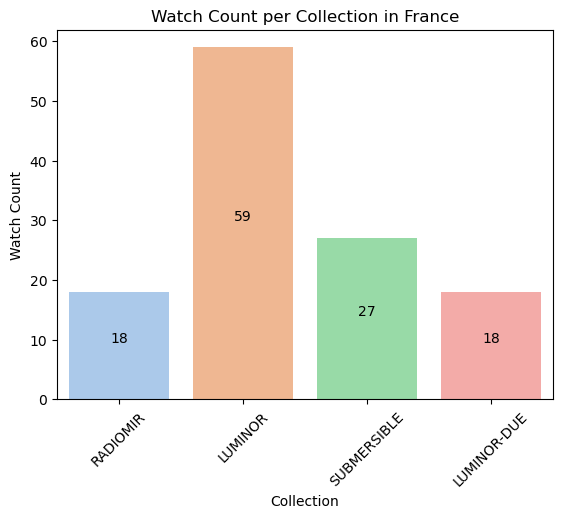

In [902]:
collection_visualization(data_2021_only_country, country)

In [903]:
overall_stats, collection_stats = analyze_country(data_2021_only_country)

#### Identify the cheapest and most expensive product in the whole subset

In [904]:
print(f"\nCheapest and most expensive product in {country}:")
print(f"  Cheapest -> Collection: {overall_stats['cheapest']['collection']}, Reference: {overall_stats['cheapest']['reference']}, Price: {overall_stats['cheapest']['price']} {(data_2021_only['currency'][data_2021_only['country'] == country]).unique()[0]}")
print(f"  Most Expensive -> Collection: {overall_stats['most_expensive']['collection']}, Reference: {overall_stats['most_expensive']['reference']}, Price: {overall_stats['most_expensive']['price']} {(data_2021_only['currency'][data_2021_only['country'] == country]).unique()[0]}")


Cheapest and most expensive product in France:
  Cheapest -> Collection: RADIOMIR, Reference: PAM00753, Price: 4400.0 EUR
  Most Expensive -> Collection: SUBMERSIBLE, Reference: PAM01108, Price: 190000.0 EUR


#### Identify the cheapest and most expensive product per collection

In [905]:
for stat in collection_stats:
    print(f"Collection: {stat['collection']}")
    print(f"  Cheapest -> Reference: {stat['cheapest']['reference']}, Price: {stat['cheapest']['price']} {(data_2021_only['currency'][data_2021_only['country'] == country]).unique()[0]}")
    print(f"  Most Expensive -> Reference: {stat['most_expensive']['reference']}, Price: {stat['most_expensive']['price']} {(data_2021_only['currency'][data_2021_only['country'] == country]).unique()[0]}")
    print("\n"+"-"*50+"\n")

Collection: RADIOMIR
  Cheapest -> Reference: PAM00753, Price: 4400.0 EUR
  Most Expensive -> Reference: PAM00997, Price: 12900.0 EUR

--------------------------------------------------

Collection: LUMINOR
  Cheapest -> Reference: PAM00774, Price: 4900.0 EUR
  Most Expensive -> Reference: PAM00768, Price: 145000.0 EUR

--------------------------------------------------

Collection: SUBMERSIBLE
  Cheapest -> Reference: PAM00973, Price: 8700.0 EUR
  Most Expensive -> Reference: PAM01108, Price: 190000.0 EUR

--------------------------------------------------

Collection: LUMINOR-DUE
  Cheapest -> Reference: PAM00755, Price: 6100.0 EUR
  Most Expensive -> Reference: PAM00741, Price: 21500.0 EUR

--------------------------------------------------



#### 3.2.1.2. USA

In [925]:
country = "USA"

data_2021_country = data_2021[data_2021['country'] == country]
data_2025_country = data_2025[data_2025['country'] == country]
data_2021_only_country = data_2021_only[data_2021_only['country'] == country]

In [926]:
number_unique_collections, top_collection, _, top_reference, collection_list = describe_country(data_2021_only_country)

print("Overall Summary:\n")
print(f"Total Number of Products from 2021 No Longer Available: {len(set(data_2021_country.reference.values)) - len(set(data_2025_country.reference.values))}")

if number_unique_collections == 1:
    print(f"\nThere is a unique collection, named {top_collection}")
else:
    print(f"\nWe have {number_unique_collections} collections, and {top_collection} is the leading one")

print("\nCatalog of Collections:")
print("\n".join([f"{i+1}. {collection}" for i, collection in enumerate(collection_list)]))

if number_unique_references == 1:
    print(f"\nThere is a unique reference: {top_reference}")
else:
    # Use the original data for lookup, not the summary!
    collection_for_top_reference = data_2021_only[data_2021_only['reference'] == top_reference]['collection'].iloc[0]
    print(f"\nWe have a total of {number_unique_references} distinct products, with {top_reference} leading the selection from the {collection_for_top_reference} collection")


Overall Summary:

Total Number of Products from 2021 No Longer Available: 29

We have 4 collections, and LUMINOR is the leading one

Catalog of Collections:
1. RADIOMIR
2. LUMINOR
3. LUMINOR-DUE
4. SUBMERSIBLE

We have a total of 176 distinct products, with PAM00233 leading the selection from the LUMINOR collection


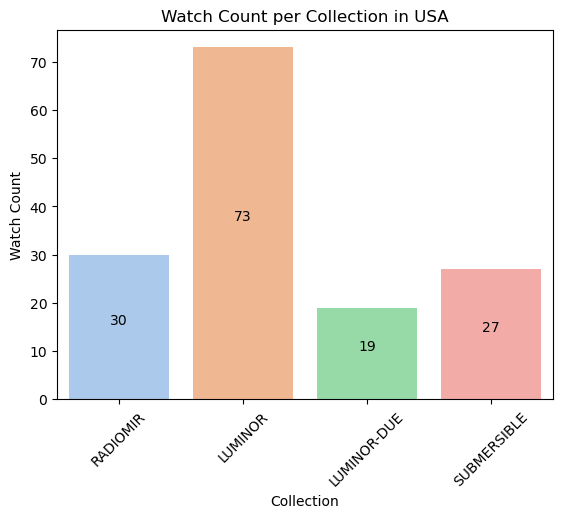

In [924]:
collection_visualization(data_2021_only_country, country)

In [909]:
overall_stats, collection_stats = analyze_country(data_2021_only_country)

#### Identify the cheapest and most expensive product in the whole subset

In [910]:
print(f"\nCheapest and most expensive product in {country}:")
print(f"  Cheapest -> Collection: {overall_stats['cheapest']['collection']}, Reference: {overall_stats['cheapest']['reference']}, Price: {overall_stats['cheapest']['price']} {(data_2021_only['currency'][data_2021_only['country'] == country]).unique()[0]}")
print(f"  Most Expensive -> Collection: {overall_stats['most_expensive']['collection']}, Reference: {overall_stats['most_expensive']['reference']}, Price: {overall_stats['most_expensive']['price']} {(data_2021_only['currency'][data_2021_only['country'] == country]).unique()[0]}")


Cheapest and most expensive product in USA:
  Cheapest -> Collection: RADIOMIR, Reference: PAM00753, Price: 5700.0 USD
  Most Expensive -> Collection: SUBMERSIBLE, Reference: PAM01108, Price: 247700.0 USD


#### Identify the cheapest and most expensive product per collection

In [911]:
for stat in collection_stats:
    print(f"Collection: {stat['collection']}")
    print(f"  Cheapest -> Reference: {stat['cheapest']['reference']}, Price: {stat['cheapest']['price']} {(data_2021_only['currency'][data_2021_only['country'] == country]).unique()[0]}")
    print(f"  Most Expensive -> Reference: {stat['most_expensive']['reference']}, Price: {stat['most_expensive']['price']} {(data_2021_only['currency'][data_2021_only['country'] == country]).unique()[0]}")
    print("\n"+"-"*50+"\n")

Collection: RADIOMIR
  Cheapest -> Reference: PAM00753, Price: 5700.0 USD
  Most Expensive -> Reference: PAM00515, Price: 27200.0 USD

--------------------------------------------------

Collection: LUMINOR
  Cheapest -> Reference: PAM00773, Price: 6400.0 USD
  Most Expensive -> Reference: PAM00768, Price: 189000.0 USD

--------------------------------------------------

Collection: LUMINOR-DUE
  Cheapest -> Reference: PAM00755, Price: 8000.0 USD
  Most Expensive -> Reference: PAM00675, Price: 32100.0 USD

--------------------------------------------------

Collection: SUBMERSIBLE
  Cheapest -> Reference: PAM00973, Price: 11300.0 USD
  Most Expensive -> Reference: PAM01108, Price: 247700.0 USD

--------------------------------------------------



#### 3.2.1.3. UK

In [912]:
country = "UK"

data_2021_country = data_2021[data_2021['country'] == country]
data_2025_country = data_2025[data_2025['country'] == country]
data_2021_only_country = data_2021_only[data_2021_only['country'] == country]

In [913]:
number_unique_collections, top_collection, _, top_reference, collection_list = describe_country(data_2021_only_country)

print("Overall Summary:\n")
print(f"Total Number of Products from 2021 No Longer Available: {len(set(data_2021_country.reference.values)) - len(set(data_2025_country.reference.values))}")

if number_unique_collections == 1:
    print(f"\nThere is a unique collection, named {top_collection}")
else:
    print(f"\nWe have {number_unique_collections} collections, and {top_collection} is the leading one")

print("\nCatalog of Collections:")
print("\n".join([f"{i+1}. {collection}" for i, collection in enumerate(collection_list)]))

if number_unique_references == 1:
    print(f"\nThere is a unique reference: {top_reference}")
else:
    # Use the original data for lookup, not the summary!
    collection_for_top_reference = data_2021_only[data_2021_only['reference'] == top_reference]['collection'].iloc[0]
    print(f"\nWe have a total of {number_unique_references} distinct products, with {top_reference} leading the selection from the {collection_for_top_reference} collection")


Overall Summary:

Total Number of Products from 2021 No Longer Available: 7

We have 4 collections, and LUMINOR is the leading one

Catalog of Collections:
1. RADIOMIR
2. LUMINOR
3. LUMINOR-DUE
4. SUBMERSIBLE

We have a total of 176 distinct products, with PAM00233 leading the selection from the LUMINOR collection


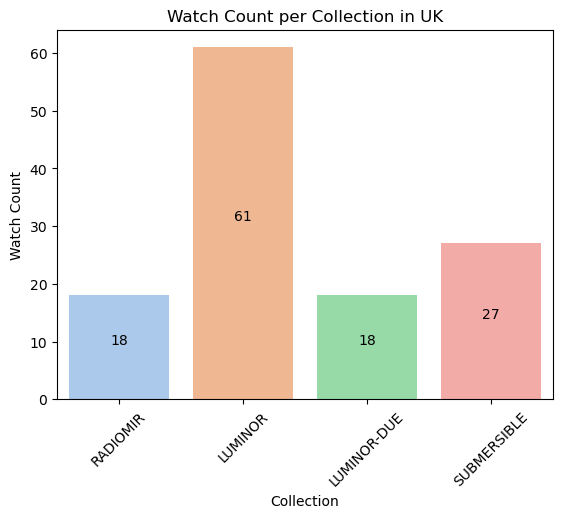

In [914]:
collection_visualization(data_2021_only_country, country)

In [915]:
overall_stats, collection_stats = analyze_country(data_2021_only_country)

#### Identify the cheapest and most expensive product in the whole subset

In [916]:
print(f"\nCheapest and most expensive product in {country}:")
print(f"  Cheapest -> Collection: {overall_stats['cheapest']['collection']}, Reference: {overall_stats['cheapest']['reference']}, Price: {overall_stats['cheapest']['price']} {(data_2021_only['currency'][data_2021_only['country'] == country]).unique()[0]}")
print(f"  Most Expensive -> Collection: {overall_stats['most_expensive']['collection']}, Reference: {overall_stats['most_expensive']['reference']}, Price: {overall_stats['most_expensive']['price']} {(data_2021_only['currency'][data_2021_only['country'] == country]).unique()[0]}")


Cheapest and most expensive product in UK:
  Cheapest -> Collection: RADIOMIR, Reference: PAM00753, Price: 3800.0 GBP
  Most Expensive -> Collection: SUBMERSIBLE, Reference: PAM01108, Price: 169900.0 GBP


#### Identify the cheapest and most expensive product per collection

In [917]:
for stat in collection_stats:
    print(f"Collection: {stat['collection']}")
    print(f"  Cheapest -> Reference: {stat['cheapest']['reference']}, Price: {stat['cheapest']['price']} {(data_2021_only['currency'][data_2021_only['country'] == country]).unique()[0]}")
    print(f"  Most Expensive -> Reference: {stat['most_expensive']['reference']}, Price: {stat['most_expensive']['price']} {(data_2021_only['currency'][data_2021_only['country'] == country]).unique()[0]}")
    print("\n"+"-"*50+"\n")

Collection: RADIOMIR
  Cheapest -> Reference: PAM00753, Price: 3800.0 GBP
  Most Expensive -> Reference: PAM00997, Price: 11500.0 GBP

--------------------------------------------------

Collection: LUMINOR
  Cheapest -> Reference: PAM00774, Price: 4300.0 GBP
  Most Expensive -> Reference: PAM00768, Price: 130000.0 GBP

--------------------------------------------------

Collection: LUMINOR-DUE
  Cheapest -> Reference: PAM00755, Price: 5500.0 GBP
  Most Expensive -> Reference: PAM00675, Price: 22400.0 GBP

--------------------------------------------------

Collection: SUBMERSIBLE
  Cheapest -> Reference: PAM00973, Price: 7600.0 GBP
  Most Expensive -> Reference: PAM01108, Price: 169900.0 GBP

--------------------------------------------------



#### 3.2.1.4. Japan

In [918]:
country = "Japan"

data_2021_country = data_2021[data_2021['country'] == country]
data_2025_country = data_2025[data_2025['country'] == country]
data_2021_only_country = data_2021_only[data_2021_only['country'] == country]

In [919]:
number_unique_collections, top_collection, _, top_reference, collection_list = describe_country(data_2021_only_country)

print("Overall Summary:\n")
print(f"Total Number of Products from 2021 No Longer Available: {len(set(data_2021_country.reference.values)) - len(set(data_2025_country.reference.values))}")

if number_unique_collections == 1:
    print(f"\nThere is a unique collection, named {top_collection}")
else:
    print(f"\nWe have {number_unique_collections} collections, and {top_collection} is the leading one")

print("\nCatalog of Collections:")
print("\n".join([f"{i+1}. {collection}" for i, collection in enumerate(collection_list)]))

if number_unique_references == 1:
    print(f"\nThere is a unique reference: {top_reference}")
else:
    # Use the original data for lookup, not the summary!
    collection_for_top_reference = data_2021_only[data_2021_only['reference'] == top_reference]['collection'].iloc[0]
    print(f"\nWe have a total of {number_unique_references} distinct products, with {top_reference} leading the selection from the {collection_for_top_reference} collection")


Overall Summary:

Total Number of Products from 2021 No Longer Available: 54

We have 4 collections, and LUMINOR is the leading one

Catalog of Collections:
1. RADIOMIR
2. LUMINOR
3. LUMINOR-DUE
4. SUBMERSIBLE

We have a total of 176 distinct products, with PAM00233 leading the selection from the LUMINOR collection


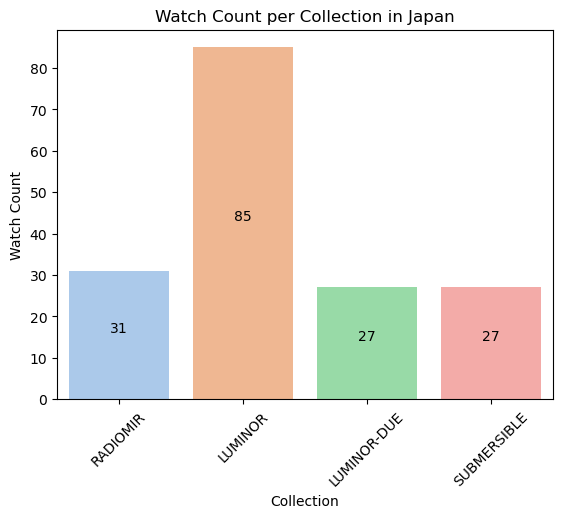

In [921]:
collection_visualization(data_2021_only_country, country)

In [765]:
overall_stats, collection_stats = analyze_country(data_2021_only_country)

#### Identify the cheapest and most expensive product in the whole subset

In [766]:
print(f"\nCheapest and most expensive product in {country}:")
print(f"  Cheapest -> Collection: {overall_stats['cheapest']['collection']}, Reference: {overall_stats['cheapest']['reference']}, Price: {overall_stats['cheapest']['price']} {(data_2021_only['currency'][data_2021_only['country'] == country]).unique()[0]}")
print(f"  Most Expensive -> Collection: {overall_stats['most_expensive']['collection']}, Reference: {overall_stats['most_expensive']['reference']}, Price: {overall_stats['most_expensive']['price']} {(data_2021_only['currency'][data_2021_only['country'] == country]).unique()[0]}")


Cheapest and most expensive product in Japan:
  Cheapest -> Collection: RADIOMIR, Reference: PAM00753, Price: 550000.0 JPY
  Most Expensive -> Collection: LUMINOR, Reference: PAM00768, Price: 18029000.0 JPY


#### Identify the cheapest and most expensive product per collection

In [767]:
for stat in collection_stats:
    print(f"Collection: {stat['collection']}")
    print(f"  Cheapest -> Reference: {stat['cheapest']['reference']}, Price: {stat['cheapest']['price']} {(data_2021_only['currency'][data_2021_only['country'] == country]).unique()[0]}")
    print(f"  Most Expensive -> Reference: {stat['most_expensive']['reference']}, Price: {stat['most_expensive']['price']} {(data_2021_only['currency'][data_2021_only['country'] == country]).unique()[0]}")
    print("\n"+"-"*50+"\n")

Collection: RADIOMIR
  Cheapest -> Reference: PAM00753, Price: 550000.0 JPY
  Most Expensive -> Reference: PAM00515, Price: 2618000.0 JPY

--------------------------------------------------

Collection: LUMINOR
  Cheapest -> Reference: PAM00773, Price: 616000.0 JPY
  Most Expensive -> Reference: PAM00768, Price: 18029000.0 JPY

--------------------------------------------------

Collection: LUMINOR-DUE
  Cheapest -> Reference: PAM00755, Price: 748000.0 JPY
  Most Expensive -> Reference: PAM00675, Price: 3091000.0 JPY

--------------------------------------------------

Collection: SUBMERSIBLE
  Cheapest -> Reference: PAM00973, Price: 1078000.0 JPY
  Most Expensive -> Reference: PAM01225, Price: 7458000.0 JPY

--------------------------------------------------

